# K Means Clustering
- Unsupervised learning algoritham
- partionining technique

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('C:/Users/DELL/Downloads/Mall_Customers.csv')

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.shape

(200, 5)

In [6]:
X = dataset.drop(['CustomerID'], axis=1)

In [7]:
print(X)

      Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


In [8]:
# data preparation

X["Genre"].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [9]:
X['Genre'] = X['Genre'].map({"Female":0,"Male":1})

In [10]:
X.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Model Fitting

In [11]:
# Importing required library

from sklearn.cluster import KMeans

In [12]:
# instance of kmeans

km = KMeans(n_clusters=4)

In [13]:
# training the model

km.fit(X)

KMeans(n_clusters=4)

In [14]:
pred = km.predict(X)
print(pred)

[3 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [15]:
X['Cluster_label'] = pred

In [16]:
X.sample(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_label
86,0,55,57,58,1
143,0,32,76,87,0
69,0,32,48,47,1
33,1,18,33,92,3
70,1,70,49,55,1
96,0,47,60,47,1
77,1,40,54,48,1
48,0,29,40,42,1
67,0,68,48,48,1
170,1,40,87,13,2


In [17]:
X['Cluster_label'].value_counts()

1    96
0    39
2    37
3    28
Name: Cluster_label, dtype: int64

# Finding optimal number of clusters using elbow curve

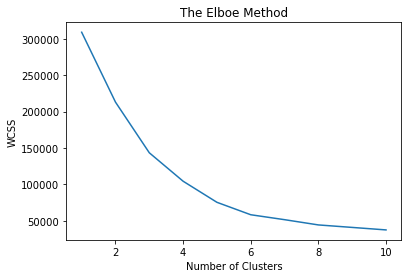

In [18]:
## Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elboe Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Training the KMeans model on the dataset

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
prediction = kmeans.predict(X)
print(prediction)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [20]:
kmeans.cluster_centers_

array([[ 3.91304348e-01,  4.52173913e+01,  2.63043478e+01,
         2.09130435e+01,  1.08695652e+00],
       [ 4.61538462e-01,  3.26923077e+01,  8.65384615e+01,
         8.21282051e+01, -8.88178420e-16],
       [ 5.13513514e-01,  4.03243243e+01,  8.74324324e+01,
         1.81891892e+01,  2.00000000e+00],
       [ 4.17721519e-01,  4.31265823e+01,  5.48227848e+01,
         4.98354430e+01,  1.12658228e+00],
       [ 4.09090909e-01,  2.52727273e+01,  2.57272727e+01,
         7.93636364e+01,  3.00000000e+00]])